# Segmenting Cells with Marked Membranes

In this notebook, we will implement a workflow to segment cells from a fluorescence microscopy image, smooth their contours, and measure their average size. Let's start by loading the necessary libraries and the image.

In [1]:
import numpy as np
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview
import pandas as pd
from skimage.measure import regionprops_table
from skimage.segmentation import expand_labels

/opt/hostedtoolcache/Python/3.12.6/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")
/opt/hostedtoolcache/Python/3.12.6/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:221: UserWarning: Error in monkey patching napari. Please let @haesleinleinhuepf know at
https://github.com/haesleinhuepf/napari-tools-menu/issues
  warnings.warn("Error in monkey patching napari. Please let @haesleinleinhuepf know at\nhttps://github.com/haesleinhuepf/napari-tools-menu/issues")


## Load the Image

Load the image of the cells with marked membranes that we will analyze.

StackViewNDArray([[ 85,  98, 129, ...,  51,  47,  47],
                  [ 85,  95, 146, ...,  51,  51,  47],
                  [ 85, 116, 163, ...,  61,  54,  58],
                  ...,
                  [ 20,  23,  20, ...,  81,  81,  88],
                  [ 23,  23,  27, ...,  75,  85,  78],
                  [ 20,  20,  27, ...,  54,  64,  68]], dtype=uint8)
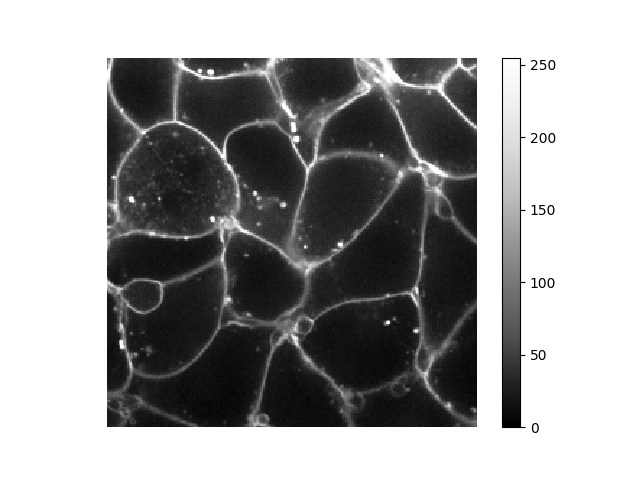
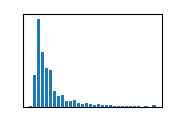

In [2]:
image = imread('../data/membranes.png')
stackview.insight(image)

## Background Removal

Use a Top-Hat filter to remove the background from the image.

StackViewNDArray([[ 0., 13., 44., ...,  4.,  0.,  0.],
                  [ 0., 10., 61., ...,  0.,  0.,  0.],
                  [ 0., 31., 78., ...,  7.,  0.,  4.],
                  ...,
                  [ 0.,  3.,  0., ..., 23., 23., 30.],
                  [ 3.,  3.,  7., ..., 17., 27., 20.],
                  [ 0.,  0.,  7., ...,  0., 10., 14.]])
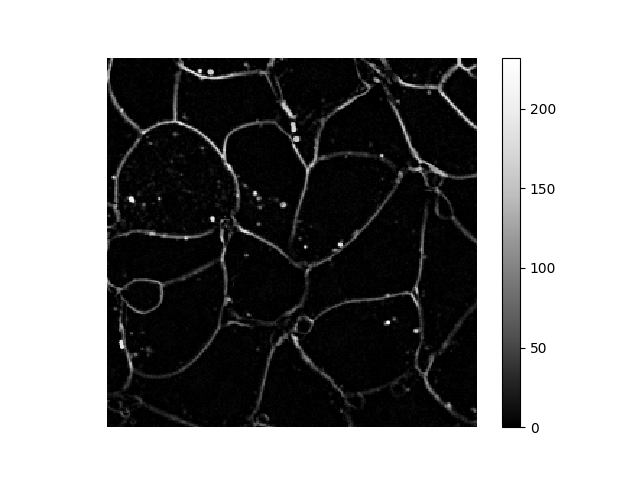
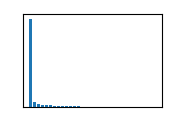

In [3]:
image_bg_removed = nsbatwm.white_tophat(image, radius=2)
stackview.insight(image_bg_removed)

## Segmentation using Local Minima Seeded Watershed

Apply a Watershed algorithm using local minima as seeds to segment the cells based on the membrane markers.

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [26, 26, 26, ..., 29, 29, 29],
                  [26, 26, 26, ..., 29, 29, 29],
                  [26, 26, 26, ..., 29, 29, 29]], dtype=int32)
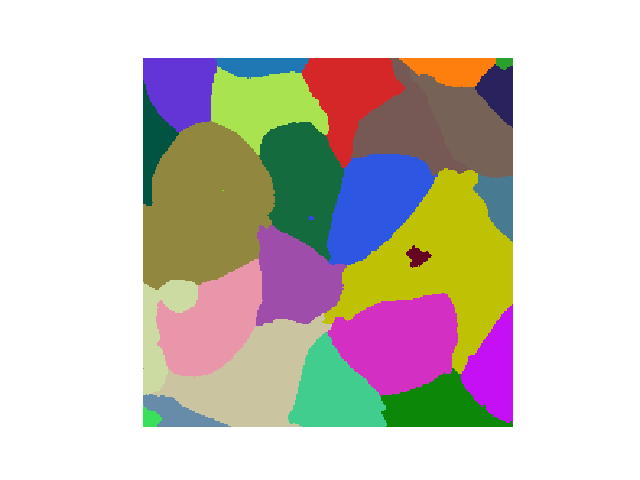

In [4]:
cells_labels = nsbatwm.local_minima_seeded_watershed(image_bg_removed, spot_sigma=10)
stackview.insight(cells_labels)

## Smooth Contours

Smooth the contours of the segmented cells to refine the segmentation.

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [26, 26, 26, ..., 22, 22, 22],
                  [26, 26, 26, ..., 22, 22, 22],
                  [26, 26, 26, ..., 22, 22, 22]], dtype=int32)
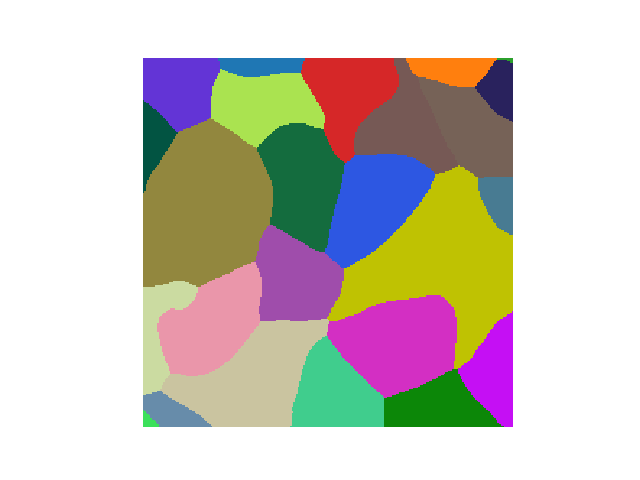

In [5]:
smoothed_labels = nsbatwm.mode_filter(cells_labels, radius=10)
stackview.insight(smoothed_labels)

## Measure Average Cell Size

Calculate the average size of the segmented cells.

In [6]:
properties = regionprops_table(smoothed_labels, properties=['label', 'area'])
df = pd.DataFrame(properties)
average_cell_size = df['area'].mean()
print(f"Average Cell Size: {average_cell_size}")

IndexError: tuple index out of range

## Display Results

Switch between the original image and the smoothed labels to visualize the results.

In [ ]:
stackview.switch([image, smoothed_labels])